In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Problem 2:** Implement PCA from scratch using numpy

In [125]:
def pca(x, k):
  """x: the data array, k: the number of principal components"""
  x0 = np.array(x).copy()
  # standardize data
  data = x0 - np.mean(x0, axis=0)
  # calculate covariance matrix
  cov_matrix = np.cov(data.T)
  eigenvalue, eigenvector = np.linalg.eig(cov_matrix)
  eigenvector = eigenvector.T

  # sort the principal components
  order = np.argsort(eigenvalue)[::-1]  # get the order from highest to lowest of eigen values
  sorted_value = eigenvalue[order]
  sorted_vector = eigenvector[order] # sort the columns of eigenvector
  projection_matrix = sorted_vector[:k]

  # calculate explained variance
  explained_variance = sorted_value / np.sum(sorted_value)
  total_explained_variance = np.cumsum(explained_variance)

  # project data
  new_data = np.dot(data, projection_matrix.T)
  return new_data, total_explained_variance

**Problem 3**: Use the algorithm implemented in Problem 2 to reduce iris data to 2 dimensions. 

iris data: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 



*   Visualize new data using scatter plot and iris label.
*   Plot explained variance graph with number of components



In [101]:
# load iris data
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [102]:
# transform the label from numeric type to categories
def transform_label(val):
  if val == 0:
    return 'Iris-setosa'
  elif val == 1:
    return 'Iris-versicolor'
  else:
    return 'Iris-virginica'

y = pd.Series(y).apply(transform_label)
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Length: 150, dtype: object

In [126]:
new_x, total_explained_variance = pca(x, k=2)
print(new_x.shape)

(150, 2)


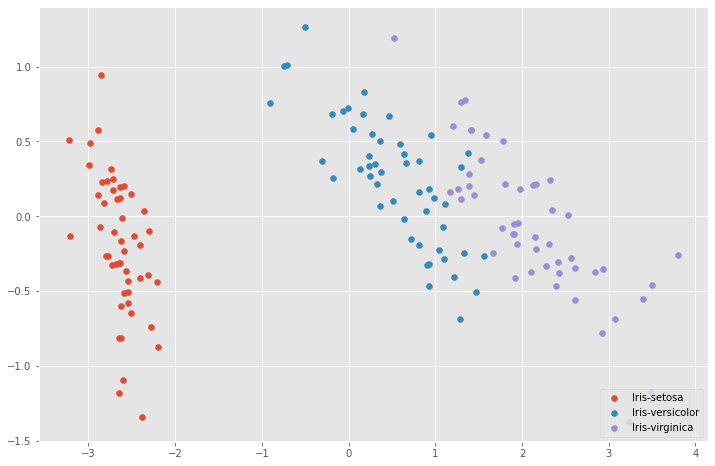

In [127]:
# Visualize new data
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    plt.scatter(x=new_x[y==species, 0], y=new_x[y==species, 1], label=species)
plt.legend(loc="lower right")

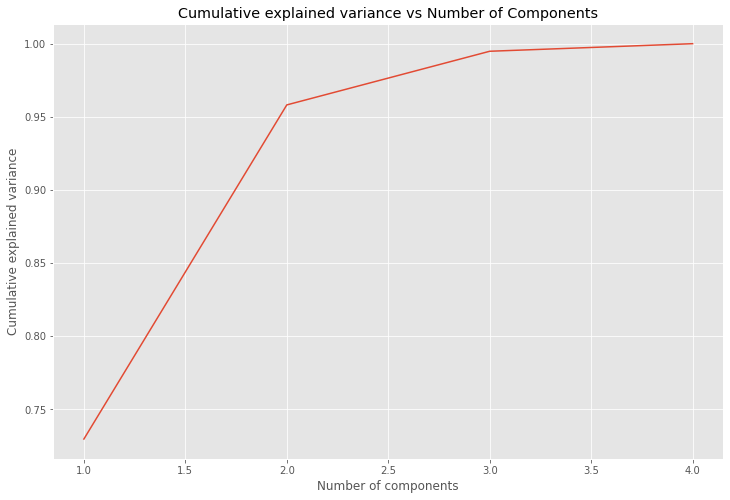

In [81]:
# Plot explained variance graph
plt.plot([1,2,3,4], total_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance vs Number of Components")
plt.show()

**Problem 4**: Reduce dimension of iris data using sklearn PCA

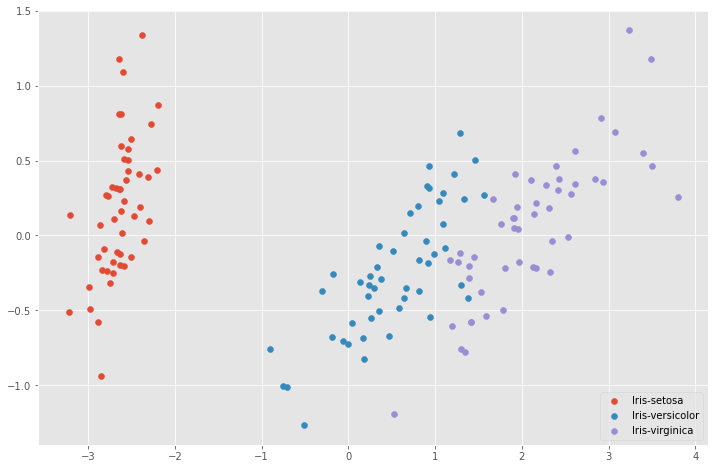

In [86]:
from sklearn.decomposition import PCA
new = PCA(n_components=2).fit_transform(iris.data)
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    plt.scatter(new[y==species, 0], new[y==species, 1], label=species)
plt.legend(loc="lower right")